## Importation des bib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import SGDClassifier


## Importation des données

In [2]:
data = pd.read_csv('Cleaned_Data.csv')

In [3]:
data.Rating.value_counts()

B      181
BBB    147
BB     125
AA     111
A       87
AAA     59
CCC     19
Name: Rating, dtype: int64

In [4]:
data['Rating'].replace(["AAA", "AA","A","BBB","BB","B","CCC"], ["Inv","Inv","Inv","Inv","Spe","Spe","Spe"], inplace=True)

In [5]:
data.Rating.value_counts()

Inv    404
Spe    325
Name: Rating, dtype: int64

In [6]:
del data['Unnamed: 0']

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X = data.drop(['Rating'], axis = 1)
y=le.fit_transform(data['Rating'])

In [8]:
le.classes_

array(['Inv', 'Spe'], dtype=object)

In [9]:
dict(zip(le.inverse_transform([0,1]),[0,1]))

{'Inv': 0, 'Spe': 1}

In [10]:
data.head()

,Rating,Nominal_GDP(bil.LC),Nominal_GDP(bil.US$),GDP_per_capita(US$),Real_GDP_growth(%),Real_GDP_per_capita_growth(%),Real_investment_growth(%),Investment/GDP(%),Savings/GDP(%),Exports/GDP(%),Unemployment_rate(%of_workforce),CPI_growth(%),GDP_deflator_growth(%),Exchange_rate_year-end(LC/$),Banks_claims_on_resident_non-govt_sector_growth,Banks_claims_on_resident_non-govt_sector/GDP,GG_balance/GDP(%),Change_in_Net_GG_debt/GDP(%),Primary_GG_balance/GDP(%),GG_Revenues/GDP(%),GG_Expenditures/GDP(%),GG_interest_expenditure/revenues(%),Gross_GG_debt/GDP(%),Debt/Revenues(%),Net_GG_debt/GDP(%),Liquid_assets/GDP,CARs/GDP(%),Real_exports_growth(%),Current_account_balance/GDP(%),Current_account_balance/CARs(%),Usable_reserves/CAPs(months),Gross_ext.fin.needs/(CAR+use.res.)(%),Net_FDI/GDP(%),Trade_balance/GDP,Net_portfolio_equity_inflow/GDP,Narrow_net_ext.debt/CARs(%),Narrow_net_ext.debt/CAPs(%),Net_ext.liabilities/CARs(%),Short-term_external_debt_by_remaining_maturity/CARs,Usable_reserves(US$mil.),Gross_LT_commercial_borrowing(US$bil.),Commercial_debt_stock(year_end_US$bil.),ST_debt(US$bil.),Bi-/Multilateral_debt(%of_total),ST_debt(%of_total),FC_debt(%of_total),LT_fixed-rate_debt(%of_total),Roll-over ratio (% of debt),Roll-over_ratio(%of_GDP)
0,Inv,11.68,31.05,22659.37,2.49,-1.68,-8.53,25.53,23.11,83.11,3.5,1.85,-9.26,0.38,8.91,64.66,-13.00,18.35,-10.69,17.49,30.49,13.20,62.10,355.04,42.07,20.03,89.81,-0.85,-2.42,-2.70,0.21,307.43,-10.07,2.68,2.84,-51.28,-49.94,-116.71,210.16,-1553.89,3.0,18.8,5.305851,2.38,27.60,42.69,72.40,24.32,15.06
1,Spe,12.12,32.23,22641.28,3.56,-0.33,10.78,29.15,24.52,74.20,4.3,2.79,0.25,0.38,2.92,64.10,-13.49,17.57,-10.50,15.66,29.14,19.08,77.64,495.85,58.09,19.55,80.80,-2.76,-4.63,-5.73,-0.68,361.98,3.49,-2.49,-3.25,-47.86,-45.26,-119.13,234.65,-3061.71,4.4,23.1,5.505319,1.82,23.39,47.64,76.61,33.34,24.34
2,Spe,13.34,35.47,23631.61,4.29,-1.09,10.57,32.94,28.86,75.78,4.2,1.39,5.52,0.38,7.68,62.72,-10.01,12.81,-6.42,16.50,26.52,21.77,85.17,516.12,65.60,19.57,81.74,3.69,-4.09,-5.00,-1.21,352.53,3.37,-1.55,0.81,-47.55,-45.29,-106.95,210.30,-4179.92,6.3,28.2,5.821809,0.00,21.42,50.94,79.32,26.84,21.31
3,Spe,14.16,37.65,25051.06,1.72,1.59,9.51,35.00,28.54,79.56,4.0,2.09,4.35,0.38,10.67,65.40,-6.32,13.41,-1.95,19.60,25.92,22.30,91.92,468.91,75.22,16.70,85.99,3.26,-6.47,-7.52,-1.44,329.63,4.10,-2.83,-2.60,-26.21,-24.37,-74.55,179.55,-5872.03,2.8,31.8,5.954787,4.02,19.10,50.00,65.60,23.80,20.91
4,Spe,14.47,38.47,25929.95,1.99,3.32,1.41,33.08,31.01,76.84,4.0,1.00,0.18,0.38,1.90,65.22,-4.73,9.40,-0.28,20.06,24.79,22.19,100.50,500.98,83.02,17.48,82.90,0.38,-2.06,-2.49,-2.16,367.19,4.41,2.23,-1.52,-43.21,-42.16,-82.82,197.10,-5093.77,3.3,31.5,5.319149,12.70,16.30,52.90,68.20,26.83,25.09


In [11]:
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=30, cv=5)
selector.fit(X, y)
X_new = selector.fit_transform(X, y)

In [12]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, random_state=44, shuffle=True)

In [13]:
print('Input Shape', (X_train.shape))
print('Output Shape', (X_test.shape))

Input Shape (619, 30)
Output Shape (110, 30)


## Regression logistique

In [14]:
logreg = LogisticRegression(random_state=44)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.9353796445880452
0.9181818181818182


## SVM

In [15]:
sm = svm.SVC().fit(X_train,y_train)
pred_train_svm = sm.predict(X_train)
y_pred_svm = sm.predict(X_test)
print ('Best CVal on training:',accuracy_score(y_train, pred_train_svm))
print ('Best Model on testing:', accuracy_score(y_test, y_pred_svm))

Best CVal on training: 0.9515347334410339
Best Model on testing: 0.9454545454545454


## Evaluation

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print(classification_report(y_train,  sm.predict(X_train)))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       346
           1       0.95      0.94      0.94       273

    accuracy                           0.95       619
   macro avg       0.95      0.95      0.95       619
weighted avg       0.95      0.95      0.95       619



In [17]:
print(classification_report(y_train,  logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       346
           1       0.94      0.92      0.93       273

    accuracy                           0.94       619
   macro avg       0.94      0.93      0.93       619
weighted avg       0.94      0.94      0.94       619



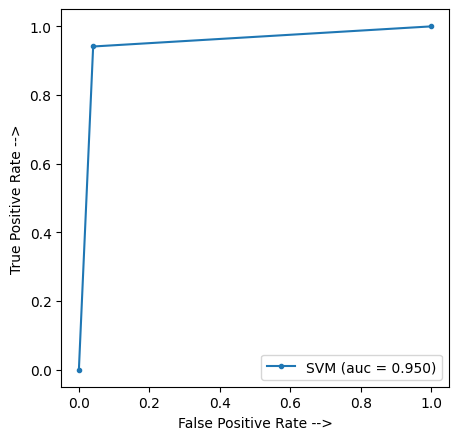

In [18]:
from sklearn.metrics import roc_curve, auc

RF_fpr, RF_tpr, threshold = roc_curve(y_train, sm.predict(X_train))
auc_RF = auc(RF_fpr, RF_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(RF_fpr, RF_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_RF)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

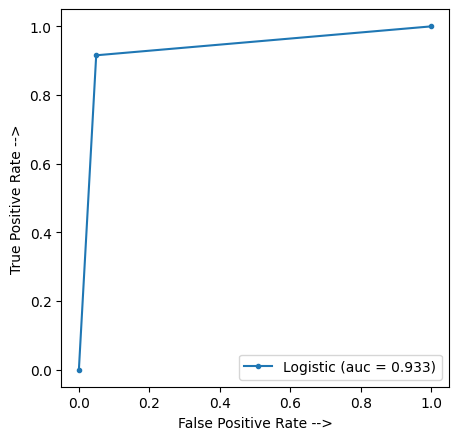

In [19]:
from sklearn.metrics import roc_curve, auc



logistic_fpr, logistic_tpr, threshold = roc_curve(y_train, logreg.predict(X_train))
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)


plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()